# Python Homework 1

**Release date:** Friday, April 3<br>
**Due date:** Friday, April 17, at midnight via GauchoSpace

**Instruction:** Please upload your jupyter notebook on GauchoSpace with filename __PythonHW1_YOURPERMNUMBER.ipynb__.


Load some packages:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
import math
import statistics

## Problem 1 (5 Points)

1. Implement the simulation of a Poisson process $(N_t)_{0 \leq t \leq 100}$ with parameter $\lambda = 0.1$ on the time interval $[0,100]$. 

In [3]:
def poisProcess(lam,t):
    arrival = [0]
    count = 0
    for i in arrival:
        if i < t:
            exp = np.random.exponential(1/lam)
            lamt = arrival[count] + exp
            if lamt > t:
                lamt = t
            arrival.append(lamt)
            count = count + 1
    return arrival
poisProcess(.1,100)

[0,
 7.122734938891504,
 9.471652080323874,
 45.716471984574724,
 54.477225450256014,
 61.298444089845624,
 68.88272124928002,
 73.11864822682863,
 79.151734009266,
 84.66160595436668,
 89.0609115461586,
 91.53863774817098,
 94.96563011533432,
 100]

2. Plot a trajectory of your simulated process from part 1. 

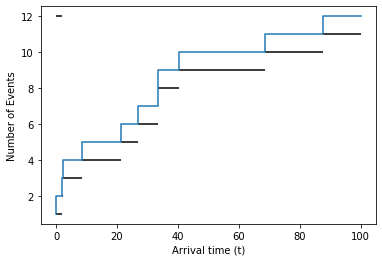

In [4]:
np.random.seed(11)
pois = poisProcess(.1,100)
count = 0
event = []
for i in pois:
    count += 1
    event.append(count)
plt.xlabel("Arrival time (t)")
plt.ylabel("Number of Events")
plt.hlines(event,pois[0:-1],pois[1:])
plt.plot(pois,event, drawstyle = 'steps')

## Problem 2 (5 Points)

1. Simulate a __compound Poisson process__ $(C_t)_{0 \leq t \leq 30}$ (see __Lecture 4__) with parameter $\lambda=1/2$ on the time interval $[0,30]$ where the jumps $Y_1, Y_2, \ldots$ are given as random variables

$$ Y_i = e^{Z_i} \qquad (i = 1,2,\ldots)$$

with $Z_1, Z_2, \ldots$ i.i.d. normally distributed random variables with mean 0 and variance 1 (also independent of the underlying Poisson process $(N_t)_{0 \leq t \leq 30}$). Plot a trajectory of your simulated process.

*Hint*: Use your method from Problem 1 to simulate the underlying Poisson Process $(N_t)_{0 \leq t \leq 30}$ driving the compound Poisson process $(C_t)_{0 \leq t \leq 30}$.

[[0, 0.23022935947849568, 4.717054438211195, 8.60903420169857, 8.969888788016505, 10.971049586482481, 11.012442209602652, 11.26070736717281, 12.02137638893292, 12.365118631574534, 15.210865936871702, 18.62139132262253, 19.46648514536838, 20.234280273352464, 20.471084499831193, 20.646460023906727, 23.14109720583209, 24.97139695292151, 25.08596394124954, 26.393037342075647, 27.42028468013686, 30], [0, 2.066284826205636, 6.773383066805563, 8.651143527609886, 9.72740478550431, 11.807203992354554, 12.333140178650392, 13.170004623400269, 13.733298074327362, 14.548454447141419, 15.163231802758466, 15.993691961282053, 16.67718663414445, 17.770242844347557, 18.835985261309204, 20.180922175618175, 24.247375170643622, 24.46029010386268, 28.113545227293763, 28.902338940540915, 29.193946543306772]]


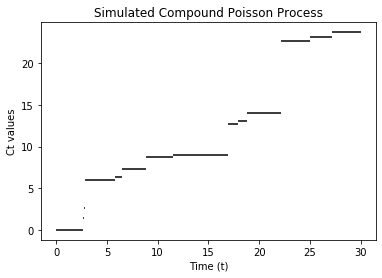

In [5]:
def compPois(lam,t):
    arrival = [0]
    count = 0
    for i in arrival:
        if i < t:
            exp = np.random.exponential(1/lam) #finding arrival times
            lamt = arrival[count] + exp #the Ni value + exponential
            if lamt > t: # t is the limit of time, x axis
                lamt = t
            arrival.append(lamt) 
            count = count + 1
    e = 0
    C = [0]
    for i in range(1,count):
        z = np.random.normal(0,1)
        e = e + np.exp(z) #adding Ct values in order to have steps
        C.append(e)
    return [arrival,C]
print(compPois(.5,30))
comp = compPois(0.5,30)
plt.title("Simulated Compound Poisson Process")
plt.xlabel("Time (t)")
plt.ylabel("Ct values")
plt.hlines(comp[1],comp[0],comp[0][1:])

2. Simulate $M=10000$ times the compound Poisson process from part 1 and compute the empricial mean and variance of your samples for the random variable $C_{30}$. Compare your empricial values with the exact theoretical values which are given by

$$\mathbb{E}[C_{30}] = \mathbb{E}[N_{30}] \cdot \mathbb{E}[Y_1] \qquad \text{and} \qquad \text{Var}(C_{30}) = \mathbb{E}[N_{30}] \cdot \mathbb{E}[Y^2_1].$$

*Hint*: Recall that 
$$\mathbb{E}[e^{Z_1}] = e^{0.5} \qquad \text{and} \qquad  \mathbb{E}[(e^{Z_1})^2] = e^2.$$

In [7]:
M = 10000
C = []
for i in range(M):
    comp = compPois(0.5,30)
    Clist = len(comp[1])-1
    C.append(comp[1][Clist]) #compiling 10,000 instances of C30s
mu = statistics.mean(C)
var = statistics.variance(C)
def theoMean(lam,t): 
    mean = lam*t*math.exp(.5)
    return mean
def theoVar(lam,t):
    var = lam*t*math.exp(2)
    return var

print("Empirical Mean:",mu,"Theoretical Mean:", theoMean(.5,30))
print("Empirical Variance:",var,"Theoretical Variance:", theoVar(.5,30))

Empirical Mean: 24.793024889146174 Theoretical Mean: 24.730819060501922
Empirical Variance: 110.6736076602419 Theoretical Variance: 110.83584148395975
